# A polyphase circuit {#sec-polyphase}

mayeb a new title: superposition and polyphase

combining two topics


## Abstract {.unnumbered}
A circuit to illustrate superposition and polyphase circuit analysis.

## Introduction
what is superposition 
what is a polyphase circuit.

as discussed below too large for useful symbolic analysis.


![](Superposition-and-polyphase-circuit.png)


What is a phasor?

[Phasor](https://en.wikipedia.org/wiki/Phasor)

In physics and engineering, a phasor (a portmanteau of phase vector[1][2]) is a complex number representing a sinusoidal function whose amplitude (A), and initial phase (θ) are time-invariant and whose angular frequency (ω) is fixed. It is related to a more general concept called analytic representation,[3] which decomposes a sinusoid into the product of a complex constant and a factor depending on time and frequency. The complex constant, which depends on amplitude and phase, is known as a phasor, or complex amplitude,[4][5] and (in older texts) sinor[6] or even complexor.[6

A common application is in the steady-state analysis of an electrical network powered by time varying current where all signals are assumed to be sinusoidal with a common frequency. Phasor representation allows the analyst to represent the amplitude and phase of the signal using a single complex number. The only difference in their analytic representations is the complex amplitude (phasor). A linear combination of such functions can be represented as a linear combination of phasors (known as phasor arithmetic or phasor algebra[7]: 53 ) and the time/frequency dependent factor that they all have in common. 

[Charles Proteus Steinmetz](https://en.wikipedia.org/wiki/Charles_Proteus_Steinmetz)


## Circuit description

The most commen every day poly phase circuits are three phase power circuits for the electric utility. In this example there thre three phases and three frequencies. To illustrate supper posistion .

- a collection of AC and DC sources
- coupled inductors
- dependent sources
- RLC
- non planer

too large to do by hand, can't simplify, not planar, so loop analysis is difficult. But also too large for symbolic solution.

| source | DC | Magnitude @ angle | frequency, Hz |
|---|---|---|---|
| V1 | 5 | 7 @ 135 | 3 | 
| V2 | 1 | 1 @ 35 | 5 | 
| I1 | 2 | 3 @ 300 | 7 | 



| source | DC | AC, mag @ phase | omega |
|---|---|---|---|
| V1 | 5 | 7 @ 135 | $2 \pi 3$ | 
| V2 | 1 | 1 @ 35 | $2 \pi 5$ | 
| I1 | 2 | 3 @ 300 | $2 \pi 7$ | 


Independent sources get set to zero one at a time for each frequency. 

V is zero because is an AC short and I is zero because no current flows and is open.

[Superposition theorem](https://en.wikipedia.org/wiki/Superposition_theorem)


What is the Superposition Theorem?

The strategy used in the superposition theorem is to eliminate all but one source of power within a network at a time. Then, we use series and parallel circuit analysis techniques to determine voltage drops and currents within the modified network for each power source separately. 

This process is then repeated sequentially by individually evaluating the circuit for every voltage and current source in the system. After each individual analysis has been completed, the voltage and current values are all “superimposed” on top of each other (added algebraically) to find the actual voltage drops and currents with all sources active.

What does it mean to turn off a current source? It means we set ‍
 
. That's the same as replacing the current source with an open circuit. 

What does it mean to turn off a voltage source? It means we set ‍
 
. This is the same thing as replacing the voltage source or battery by a short circuit.

The theorem does not apply to non-linear circuits. The requisite of linearity indicates that the superposition theorem is only applicable to determine voltage and current but not power. Power dissipation is a nonlinear function that does not algebraically add to an accurate total when only one source is considered at a time. 

Superposition works for voltage and current but not power. In other words, the sum of the powers of each source with the other sources turned off is not the real consumed power. To calculate power we first use superposition to find both current and voltage of each linear element and then calculate the sum of the multiplied voltages and currents. 

## Circuit description

```
V1 6 1 5 AC 7 90
V2 10 12 1 AC 1 35
I3 3 4 2 AC 3 210
L3 11 14 3 Rser=0
L1 1 5 5 Rser=0
L4 14 13 2 Rser=0
L2 4 8 7 Rser=0
H1 7 3 V2 2
G1 12 14 8 2 2
C1 3 1 0.02279
C2 4 13 0.008443
C3 13 12 0.01266
R9 2 10 10
R6 7 0 50
R4 5 14 1
R1 1 2 100
R3 3 4 75
R7 0 8 200
R11 14 12 10
R5 6 9 10
R10 9 11 1
R8 9 0 100
R2 3 12 20
K1 L3 L4 0.4
```


In [77]:
import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
init_printing()

In electrical engineering, a time invarient sinusudial signal can be represented either by polar or rectangular notation. The function polar converts the polar representation, also called a phasor to rectangular notation. 

In [116]:
def polar(mag, ang, units='deg'):
    ''' polar to rectangular conversion
        mag: float
            magnitude of the time invarient sinusudial signal
        ang: float
            the angle of the time invarient sinusudial signal
        units: string
            if units is set to deg, and is in degrees not radians
    '''
    if units == 'deg':
        ang = ang * np.pi / 180
    return mag * np.exp(1j * ang)

## Symbolic MNA code 

## Load the net list
independent sources have their values set to the DC value.

In [91]:
example_net_list = '''
V1 6 1 5 
V2 10 12 1 
I3 3 4 2 
L3 11 14 3 
L1 1 5 5 
L4 14 13 2 
L2 4 8 7 
H1 7 3 V2 2
G1 12 14 8 2 2
C1 3 1 0.02279
C2 4 13 0.008443
C3 13 12 0.01266
R9 2 10 10
R6 7 0 50
R4 5 14 1
R1 1 2 100
R3 3 4 75
R7 0 8 200
R11 14 12 10
R5 6 9 10
R10 9 11 1
R8 9 0 100
R2 3 12 20
K1 L3 L4 0.4
'''

In [92]:
report, df, df2, A, X, Z = SymMNA.smna(example_net_list)

In [93]:
print(report)

Net list report
number of lines in netlist: 24
number of branches: 23
number of nodes: 14
number of unknown currents: 7
number of RLC (passive components): 18
number of inductors: 4
number of independent voltage sources: 2
number of independent current sources: 1
number of op amps: 0
number of E - VCVS: 0
number of G - VCCS: 1
number of F - CCCS: 0
number of H - CCVS: 1
number of K - Coupled inductors: 1



In [94]:
# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

In [95]:
equ = Eq(A*X,Z)

In [96]:
equ

⎡                                       ⎛       1 ⎞   v₂            ⎤        
⎢           -C₁⋅s⋅v₃ + I_L1 - I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ──            ⎥        
⎢                                       ⎝       R₁⎠   R₁            ⎥        
⎢                                                                   ⎥        
⎢                         ⎛1    1 ⎞   v₁₀   v₁                      ⎥        
⎢                      v₂⋅⎜── + ──⎟ - ─── - ──                      ⎥        
⎢                         ⎝R₉   R₁⎠    R₉   R₁                      ⎥        
⎢                                                                   ⎥        
⎢                              ⎛       1    1 ⎞   v₄   v₁₂          ⎥        
⎢         -C₁⋅s⋅v₁ - I_H1 + v₃⋅⎜C₁⋅s + ── + ──⎟ - ── - ───          ⎥        
⎢                              ⎝       R₃   R₂⎠   R₃    R₂          ⎥        
⎢                                                                   ⎥        
⎢                                    ⎛       1 ⎞   v₃           

In [97]:
# turn the free symbols into SymPy variables
var(str(equ.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

## Built a dictionary of element values

In [122]:
element_value_keys = []
element_value_values = []

for i in range(len(df)):
    if df.iloc[i]['element'][0] == 'F' or df.iloc[i]['element'][0] == 'E' or df.iloc[i]['element'][0] == 'G' or df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(df.iloc[i]['element'].lower()))
        element_value_values.append(df.iloc[i]['value'])
        #print('{:s}:{:f},'.format(df.iloc[i]['element'].lower(),df.iloc[i]['value']))
    else:
        element_value_keys.append(var(df.iloc[i]['element']))
        element_value_values.append(df.iloc[i]['value'])
        #print('{:s}:{:.4e},'.format(df.iloc[i]['element'],df.iloc[i]['value']))

element_values = dict(zip(element_value_keys, element_value_values))

In [123]:
# calculate the coupling constant from the mutual inductance
element_values[M1] = element_values[K1]*np.sqrt(element_values[L3] *element_values[L4])
print('mutual inductance, M1 = {:.9f}'.format(element_values[M1]))

mutual inductance, M1 = 0.979795897


In [124]:
element_values

In [151]:
element_values[I3]

## Operating point


In [125]:
equ_values = equ.subs(element_values)
equ_values

⎡                I_L1 - I_V1 - 0.02279⋅s⋅v₃ + v₁⋅(0.02279⋅s + 0.01) - 0.01⋅v₂ 
⎢                                                                             
⎢                                -0.01⋅v₁ - 0.1⋅v₁₀ + 0.11⋅v₂                 
⎢                                                                             
⎢-I_H1 - 0.02279⋅s⋅v₁ - 0.05⋅v₁₂ + v₃⋅(0.02279⋅s + 0.0633333333333333) - 0.013
⎢                                                                             
⎢    I_L2 - 0.008443⋅s⋅v₁₃ - 0.0133333333333333⋅v₃ + v₄⋅(0.008443⋅s + 0.013333
⎢                                                                             
⎢                                    -I_L1 - v₁₄ + 1.0⋅v₅                     
⎢                                                                             
⎢                                   I_V1 + 0.1⋅v₆ - 0.1⋅v₉                    
⎢                                                                             
⎢                                       I_H1 + 0.02⋅

In [126]:
equ_values_dc = equ_values.subs({s:0})
equ_values_dc  # display the equations

⎡                I_L1 - I_V1 + 0.01⋅v₁ - 0.01⋅v₂                 ⎤   ⎡ 0  ⎤
⎢                                                                ⎥   ⎢    ⎥
⎢                  -0.01⋅v₁ - 0.1⋅v₁₀ + 0.11⋅v₂                  ⎥   ⎢ 0  ⎥
⎢                                                                ⎥   ⎢    ⎥
⎢-I_H1 - 0.05⋅v₁₂ + 0.0633333333333333⋅v₃ - 0.0133333333333333⋅v₄⎥   ⎢-2.0⎥
⎢                                                                ⎥   ⎢    ⎥
⎢      I_L2 - 0.0133333333333333⋅v₃ + 0.0133333333333333⋅v₄      ⎥   ⎢2.0 ⎥
⎢                                                                ⎥   ⎢    ⎥
⎢                      -I_L1 - v₁₄ + 1.0⋅v₅                      ⎥   ⎢ 0  ⎥
⎢                                                                ⎥   ⎢    ⎥
⎢                     I_V1 + 0.1⋅v₆ - 0.1⋅v₉                     ⎥   ⎢ 0  ⎥
⎢                                                                ⎥   ⎢    ⎥
⎢                         I_H1 + 0.02⋅v₇                         ⎥   ⎢ 0  ⎥
⎢           

In [184]:
U_dc = solve(equ_values_dc,X)
U_dc

In [196]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown            mag    phase, deg
---------  -----------  ------------
v1         1432.925371    180.000000
v2          696.881580      0.000000
v3          621.290619      0.000000
v4          560.938632      0.000000
v5         1432.925371    180.000000
v6         1427.925371    180.000000
v7          578.694480      0.000000
v8          560.938632      0.000000
v9         1437.858277    180.000000
v10         909.862275      0.000000
v11        1453.230150    180.000000
v12         908.862275      0.000000
v13        1453.230150    180.000000
v14        1453.230150    180.000000
I_V1          0.993291    180.000000
I_V2         21.298070    180.000000
I_L3         15.371873      0.000000
I_L1         20.304779      0.000000
I_L4          0.000000    nan
I_L2          2.804693      0.000000
I_H1         11.573890    180.000000


LTSpice results:  
```
--- Operating Point ---
V(6):	 -1427.93	 voltage
V(1):	 -1432.93	 voltage
V(10):	 909.862	 voltage
V(12):	 908.862	 voltage
V(3):	 621.291	 voltage
V(4):	 560.939	 voltage
V(11):	 -1453.23	 voltage
V(14):	 -1453.23	 voltage
V(5):	 -1432.93	 voltage
V(13):	 -1453.23	 voltage
V(8):	 560.939	 voltage
V(7):	 578.694	 voltage
V(2):	 696.882	 voltage
V(9):	 -1437.86	 voltage
I(C1):	 4.68156e-11	 device_current
I(C2):	 1.70056e-11	 device_current
I(C3):	 -2.99041e-11	 device_current
I(H1):	 -11.5739	 device_current
I(L3):	 15.3719	 device_current
I(L1):	 20.3048	 device_current
I(L4):	 -4.69091e-11	 device_current
I(L2):	 2.80469	 device_current
I(I3):	 2	 device_current
I(R9):	 -21.2981	 device_current
I(R6):	 11.5739	 device_current
I(R4):	 20.3048	 device_current
I(R1):	 -21.2981	 device_current
I(R3):	 0.804693	 device_current
I(R7):	 -2.80469	 device_current
I(R11):	 -236.209	 device_current
I(R5):	 0.993291	 device_current
I(R10):	 15.3719	 device_current
I(R8):	 -14.3786	 device_current
I(R2):	 -14.3786	 device_current
I(G1):	 -271.886	 device_current
I(V1):	 -0.993291	 device_current
I(V2):	 -21.2981	 device_current
```


## Independednt sources with the same frequency

In [187]:
ev_w = element_values.copy() # ev for element values

In [188]:
ev_w[I3] = polar(3, 300, units='deg')
ev_w[V2] = polar(1, 35, units='deg')
ev_w[V1] = polar(7, 135, units='deg')

In [189]:
ev_w

{V1: (-4.949747468305832+4.949747468305833j),
 V2: (0.8191520442889918+0.573576436351046j),
 I3: (1.5000000000000004-2.598076211353316j),
 L3: 3.0,
 L1: 5.0,
 L4: 2.0,
 L2: 7.0,
 h1: 2.0,
 g1: 2.0,
 C1: 0.02279,
 C2: 0.008443,
 C3: 0.01266,
 R9: 10.0,
 R6: 50.0,
 R4: 1.0,
 R1: 100.0,
 R3: 75.0,
 R7: 200.0,
 R11: 10.0,
 R5: 10.0,
 R10: 1.0,
 R8: 100.0,
 R2: 20.0,
 K1: 0.4,
 M1: 0.9797958971132712}

In [190]:
equ_ev_w = equ.subs(ev_w)

In [191]:
equ_ev_w = equ_ev_w.subs({s:2*np.pi*3j})

In [192]:
equ_ev_w

⎡                I_L1 - I_V1 + v₁⋅(0.01 + 0.429581379451868⋅ⅈ) - 0.01⋅v₂ - 0.4
⎢                                                                             
⎢                                          -0.01⋅v₁ - 0.1⋅v₁₀ + 0.11⋅v₂       
⎢                                                                             
⎢-I_H1 - 0.429581379451868⋅ⅈ⋅v₁ - 0.05⋅v₁₂ + v₃⋅(0.0633333333333333 + 0.429581
⎢                                                                             
⎢     I_L2 - 0.159146800645552⋅ⅈ⋅v₁₃ - 0.0133333333333333⋅v₃ + v₄⋅(0.013333333
⎢                                                                             
⎢                                              -I_L1 - v₁₄ + 1.0⋅v₅           
⎢                                                                             
⎢                                             I_V1 + 0.1⋅v₆ - 0.1⋅v₉          
⎢                                                                             
⎢                                                 I_

In [193]:
U_w = solve(equ_ev_w,X)
U_w

In [197]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown           mag    phase, deg
---------  ----------  ------------
v1          32.974947    110.848692
v2         228.085097     26.560180
v3          13.358784     26.142224
v4         242.676934     54.390602
v5         394.884910    -50.137234
v6          39.466281    115.010256
v7           8.879958     30.167939
v8         202.565177     20.976390
v9         118.848327   -157.655839
v10        250.586925     25.809942
v11        131.797039   -155.941733
v12        249.599812     25.773280
v13        258.910739     47.192371
v14        394.796803    -50.793317
I_V1        12.347531   -139.036272
I_V2         2.271853   -161.743805
I_L3        13.479150     39.350535
I_L1         4.522081     38.418341
I_L4        19.264101   -161.414701
I_L2         1.012826     20.976390
I_H1         0.177599   -149.832061


In [173]:
ans1[v1]-ans1[v2]

In [174]:
abs(ans1[v1]-ans1[v2])

In [176]:
float(arg(ans1[v1]-ans1[v2])*180/np.pi)

## Independednt sources with the different frequencies

| source | DC | AC, mag @ phase | frequency, Hz |
|---|---|---|---|
| V1 | 5 | 7 @ 135 | 3 | 
| V2 | 1 | 1 @ 35 | 5 | 
| I1 | 2 | 3 @ 300 | 7 | 

 $2 \pi 3$

## AC analysis
 



Solve equations a frequency of 1.491MHz or $\omega$ equal to 9.3682292e6 radians per second, s = 9.3682292e6j.

2. Find the current in R1 and the voltage across v1-v2
```
number of independent voltage sources: 2  
number of independent current sources: 1  

V1 6 1 5 AC 7 90
V2 10 12 1 AC 1 35
I3 3 4 2 AC 3 210
```


## Numeric solution
Substitue the element values into the equations and solve for unknown node voltages and currents. Need to set the current source, I1, to zero.

In [110]:
element_values[V1]

In [113]:
element_values[V1] = 1+1j

In [114]:
element_values[V1]

(1+1j)

In [115]:
3j

3j

In [119]:
polar(7, 100, units='deg')

(-1.2155372436685121+6.893654271085456j)

In [74]:
equ1a_1rad_per_s = equ1a.subs({s:3+9.3682292e6j})
equ1a_1rad_per_s  # display the equations

⎡            I_L1 - I_V1 + v₁⋅(0.07837 + 213501.943468⋅ⅈ) - 0.01⋅v₂ - 0.02279⋅
⎢                                                                             
⎢                                         -0.01⋅v₁ - 0.1⋅v₁₀ + 0.11⋅v₂        
⎢                                                                             
⎢            -I_H1 - 0.02279⋅v₁⋅(3.0 + 9368229.2⋅ⅈ) - 0.05⋅v₁₂ + v₃⋅(1.11837 +
⎢                                                                             
⎢                I_L2 - 0.008443⋅v₁₃⋅(3.0 + 9368229.2⋅ⅈ) - v₃ + v₄⋅(1.025329 +
⎢                                                                             
⎢                                          -I_L1 - 10.0⋅v₁₄ + 10.0⋅v₅         
⎢                                                                             
⎢                                            I_V1 + 0.1⋅v₆ - 0.1⋅v₉           
⎢                                                                             
⎢                                                 I_

In [75]:
ans1 = solve(equ1a_1rad_per_s,X)
ans1

In [76]:
for name, value in ans1.items():
    print('{:5s}: mag: {:10.6f} phase: {:11.5f} deg'.format(str(name),float(abs(value)),float(arg(value)*180/np.pi)))

v1   : mag:   0.006844 phase:    -0.00188 deg
v2   : mag:   2.624870 phase:    -0.00004 deg
v3   : mag:   0.006844 phase:    -0.00264 deg
v4   : mag:   1.886672 phase:    -0.00014 deg
v5   : mag:  50.610718 phase:  -179.99981 deg
v6   : mag:   5.006844 phase:    -0.00000 deg
v7   : mag:   0.045517 phase:  -179.99965 deg
v8   : mag:   0.000006 phase:   -89.99995 deg
v9   : mag:   4.551676 phase:     0.00039 deg
v10  : mag:   2.886672 phase:    -0.00004 deg
v11  : mag:   4.551676 phase:     0.00039 deg
v12  : mag:   1.886672 phase:    -0.00007 deg
v13  : mag:   1.886672 phase:    -0.00010 deg
v14  : mag:  50.610718 phase:  -179.99981 deg
I_V1 : mag:   0.045517 phase:   179.99608 deg
I_V2 : mag:   0.026180 phase:   179.99996 deg
I_L3 : mag:   0.000003 phase:   -89.99978 deg
I_L1 : mag:   0.000001 phase:   -89.99979 deg
I_L4 : mag:   0.000004 phase:    90.00020 deg
I_L2 : mag:   0.000000 phase:   -89.99995 deg
I_H1 : mag:   0.045517 phase:     0.00035 deg


In [82]:
table_header = ['unknown', 'mag, dB','phase, deg']
table_row = []

for name, value in ans1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown      mag, dB    phase, deg
---------  ---------  ------------
v1          0.006844     -0.001885
v2          2.624870     -0.000043
v3          0.006844     -0.002643
v4          1.886672     -0.000142
v5         50.610718   -179.999810
v6          5.006844     -0.000003
v7          0.045517   -179.999647
v8          0.000006    -89.999949
v9          4.551676      0.000389
v10         2.886672     -0.000043
v11         4.551676      0.000394
v12         1.886672     -0.000065
v13         1.886672     -0.000096
v14        50.610718   -179.999810
I_V1        0.045517    179.996077
I_V2        0.026180    179.999962
I_L3        0.000003    -89.999784
I_L1        0.000001    -89.999792
I_L4        0.000004     90.000205
I_L2        0.000000    -89.999949
I_H1        0.045517      0.000353


## AC Sweep


## Find  $V_{1}(s)-V_{2}(s)$.

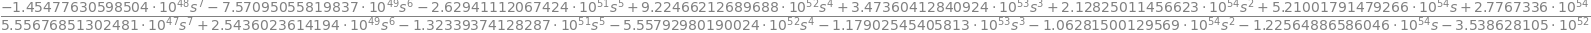

In [83]:
H = (u1[v1]-u1[v2]).cancel()
H

In [84]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit

In [85]:
x = np.logspace(-3, 3, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

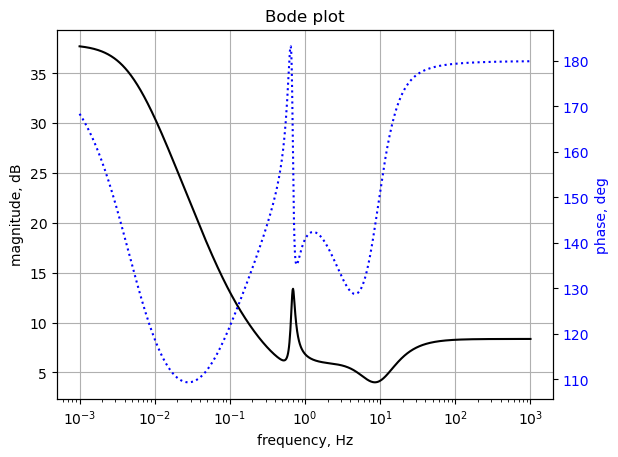

In [86]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
plt.semilogx(w/(2*np.pi), phase,':',color='b')  # Bode phase plot

ax2.set_ylabel('phase, deg',color='b')
ax2.tick_params(axis='y', labelcolor='b')
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

In [69]:
print('peak: {:.2f} dB at {:.3f} Hz'.format(mag.max(),w[np.argmax(mag)]/(2*np.pi)))

peak: 11.21 dB at 0.684 Hz


## Summary